In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'D:\Netflix\Practice\fire.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.shape

(246, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df.nunique()

day             33
month            5
year             2
Temperature     20
 RH             63
 Ws             19
Rain            40
FFMC           174
DMC            167
DC             199
ISI            107
BUI            175
FWI            128
Classes          9
dtype: int64

In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [8]:
# columns which has null values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
# The dataset is converted into two sets based on Region from 122th index,
# we can make a new column based on the Region

#  **1 : "Bejaia Region Dataset"**

#  **2 : "Sidi-Bel Abbes Region Dataset"**
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']]=df[['Region']].astype(int)

In [10]:
df =df.dropna().reset_index(drop=True)
df.shape

(244, 15)

In [11]:
# columns which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [12]:
df=df.drop(122).reset_index(drop=True)
df.shape

(243, 15)

In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [14]:
# remove extra space from column name
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [15]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [17]:
objects=[features for features in df.columns if df[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df[i]=df[i].astype(float)

In [18]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [19]:
# combine year,month and day to one column named it date

df['date']=pd.to_datetime(df[['year','month','day']])
df['date']=df['date'].dt.date
df=df.drop(['day','month','year'],axis=1)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2,2012-09-26
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2,2012-09-27
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2,2012-09-28
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2,2012-09-29


In [20]:
# Rearrange column using list comprehension make date as first column
df=df[['date'] + [col for col in df.columns if col!='date']]
df

,date,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,2012-06-01,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2012-06-02,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,2012-06-03,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,2012-06-04,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,2012-06-05,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2012-09-26,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,2012-09-27,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,2012-09-28,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,2012-09-29,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [21]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [22]:
# Removing misplaced values, extra spaces from column
df['Classes']=df['Classes'].str.strip()

In [23]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [24]:
df

,date,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,2012-06-01,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2012-06-02,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,2012-06-03,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,2012-06-04,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,2012-06-05,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2012-09-26,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,2012-09-27,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,2012-09-28,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,2012-09-29,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [25]:
df['Region'].value_counts()

1    122
2    121
Name: Region, dtype: int64

Region 1:Bejaia Region

In [26]:
df[:122]

,date,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,2012-06-01,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2012-06-02,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,2012-06-03,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,2012-06-04,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,2012-06-05,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2012-09-26,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,2012-09-27,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,2012-09-28,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,2012-09-29,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


Region 2: - Sidi- Bel- Abbes Region

In [27]:
df[122:]

,date,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,2012-06-01,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2012-06-02,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,2012-06-03,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,2012-06-04,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,2012-06-05,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2012-09-26,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,2012-09-27,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,2012-09-28,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,2012-09-29,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [28]:
# encoded fire as 1 and not fire as 0
df['Classes']=df['Classes'].map({'fire':1,'not fire':0})

In [29]:
df['Classes'].value_counts()


1    137
0    106
Name: Classes, dtype: int64

In [30]:
df

,date,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,2012-06-01,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2012-06-02,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,2012-06-03,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,2012-06-04,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,2012-06-05,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2012-09-26,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,2012-09-27,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,2012-09-28,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,2012-09-29,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


In [31]:
class_counts= df['Classes'].value_counts()

In [32]:
class_percentage=(class_counts/class_counts.sum())*100
class_percentage 

1    56.378601
0    43.621399
Name: Classes, dtype: float64

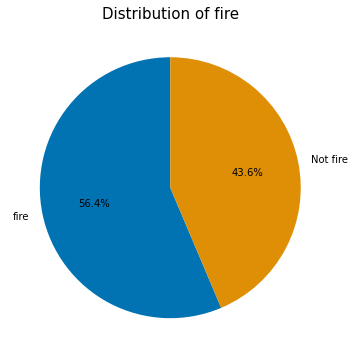

In [33]:
classeslabels=['fire','Not fire']
plt.figure(figsize=(6,6))
plt.pie(class_percentage,labels=classeslabels,autopct='%1.1f%%',startangle=90, colors=sns.color_palette('colorblind'))
plt.title('Distribution of fire',fontsize=15)
plt.show()

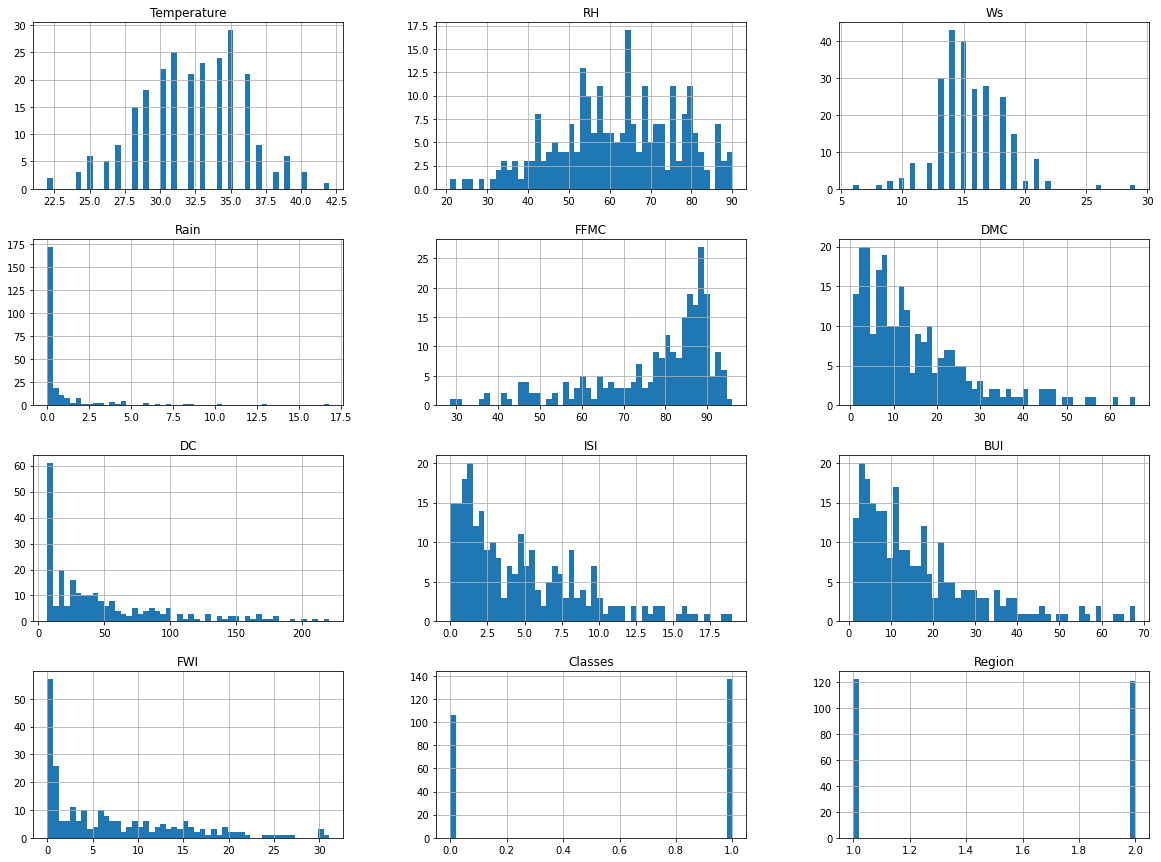

In [34]:
df.hist(bins=50,figsize=(20,15))
plt.show()

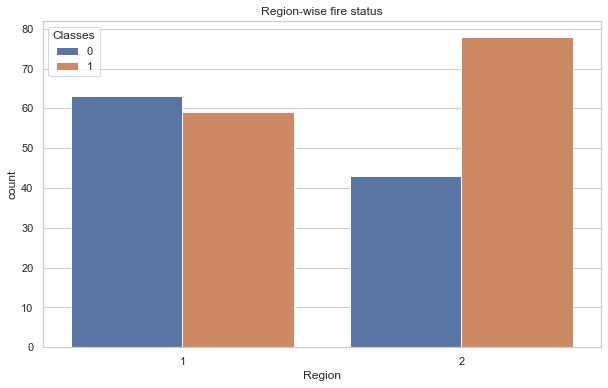

In [35]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))

sns.countplot(data=df,x='Region',hue='Classes')
plt.title('Region-wise fire status')
plt.show()

Region 2 has most fire incident happend as compared to Region 1

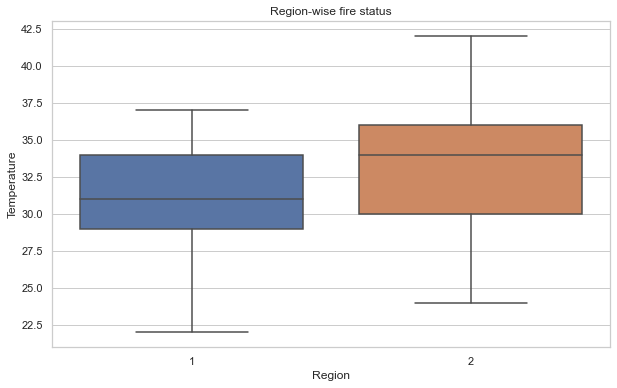

In [36]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))

sns.boxplot(data=df,x='Region',y='Temperature')
plt.title('Region-wise fire status')
plt.show()

Region-2 has more temperature as compared to Region-1

In [37]:
df

,date,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,2012-06-01,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2012-06-02,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,2012-06-03,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,2012-06-04,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,2012-06-05,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2012-09-26,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,2012-09-27,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,2012-09-28,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,2012-09-29,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


In [38]:
df['date']=pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

In [39]:
df['month']=df['date'].dt.month


In [40]:
# Max Temperature region wise
max_temp_month=df.loc[df.groupby('Region')['Temperature'].idxmax()]
max_temp_month

,date,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,month
77,2012-08-17,37,52,18,0.0,89.3,16.0,100.7,9.7,22.9,14.6,1,1,8
198,2012-08-17,42,24,9,0.0,96.0,30.3,76.4,15.7,30.4,24.0,1,2,8


In [41]:
avg_temp_month=df.groupby(['Region','month'])['Temperature'].mean().reset_index()
avg_temp_month

,Region,month,Temperature
0,1,6,29.800000
1,1,7,31.838710
2,1,8,34.387097
3,1,9,28.566667
4,2,6,31.800000
5,2,7,34.166667
6,2,8,36.290323
7,2,9,30.166667


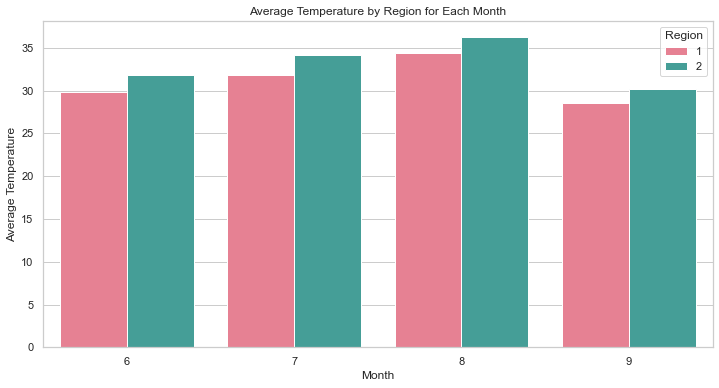

In [42]:
plt.figure(figsize=(12,6))

sns.barplot(x='month',y='Temperature',hue='Region',data=avg_temp_month, palette='husl')

plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Region for Each Month')
plt.legend(title='Region')
plt.show()    

In each month the avg temperature of region-2 is high

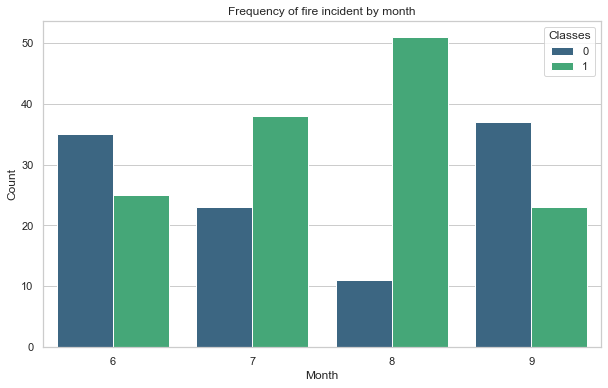

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='month',hue='Classes',palette='viridis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Frequency of fire incident by month')
plt.show()

In the month of August fire incident is more because in august the temperature was high.

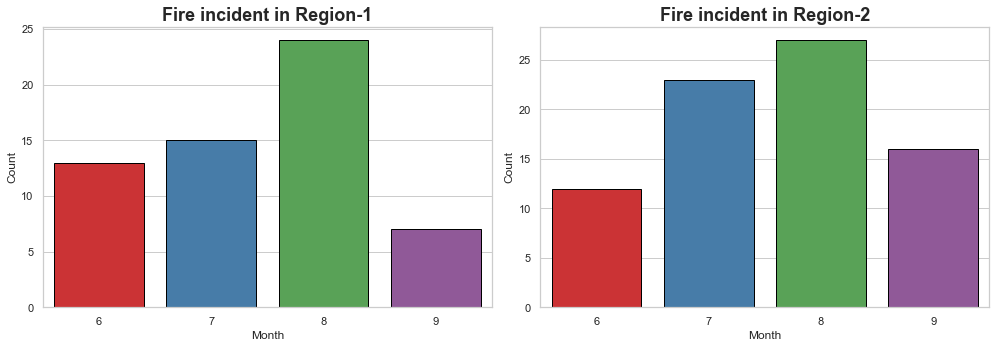

In [45]:
sns.set(style='whitegrid')
fig,axes=plt.subplots(1,2, figsize=(14,5))

df_region1=df[(df['Region']==1) & (df['Classes']==1)]
sns.countplot(data=df_region1,x='month',palette='Set1', ec='black', ax=axes[0])
axes[0].set_title('Fire incident in Region-1',fontsize=18,weight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

df_region2=df[(df['Region']==2) & (df['Classes']==1)]
sns.countplot(data=df_region2,x='month',palette='Set1', ec='black', ax=axes[1])
axes[1].set_title('Fire incident in Region-2',fontsize=18,weight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In the month of august most fire incident occured in region 1 and 2
In the month of september very less fire incident occured

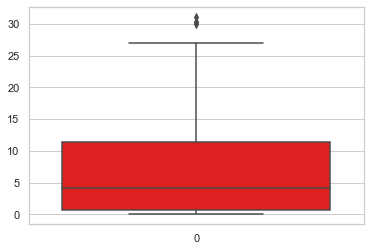

In [46]:
# FWI= Fire whether index
ax=sns.boxplot(data=df['FWI'],color='red')

In [47]:
monthly_rainfall=df.groupby('month')['Rain'].sum()
max_Rainfall_month=monthly_rainfall.idxmax()
min_rainfall_month=monthly_rainfall.idxmin()
print(max_Rainfall_month,min_rainfall_month)

9 7


Most rainfall occured in september
Less rainfall in july

In [48]:
monthly_windspeed=df.groupby('month')['Ws'].sum()
max_windspeed_month=monthly_windspeed.idxmax()
min_windspeed_month=monthly_windspeed.idxmin()
print(max_windspeed_month,min_windspeed_month)

7 9


<AxesSubplot:xlabel='Temperature', ylabel='count'>

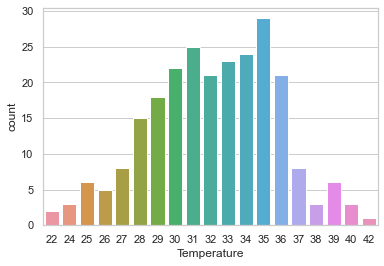

In [52]:
sns.countplot(data=df,x='Temperature')

In [55]:
def barchart(feature,xlabel):
    plt.figure(figsize=(14,8))
    by_feature=df.groupby([feature],as_index=False)['Classes'].sum()
    ax=sns.barplot(data=by_feature[[feature,'Classes']],x=feature,y='Classes',estimator=sum)
    ax.set(xlabel=xlabel,ylabel='Fire Count')

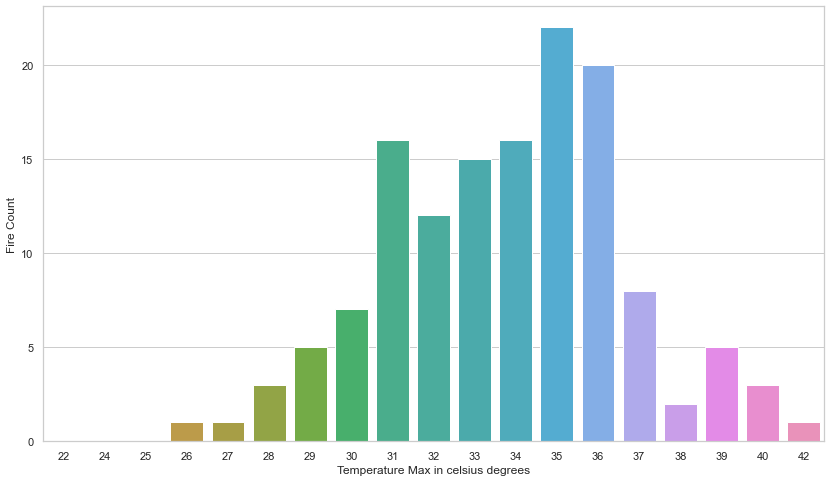

In [69]:
barchart('Temperature','Temperature Max in celsius degrees')

Most fire incident occured between the temperature 30-37 degree celsius

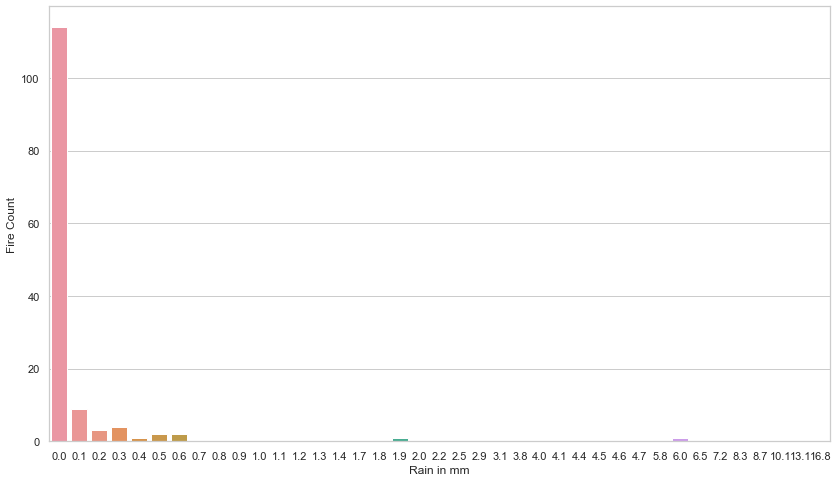

In [57]:
barchart('Rain','Rain in mm')

Highest fire incident occured when the rainfall was in the range from 0.0 to 0.3

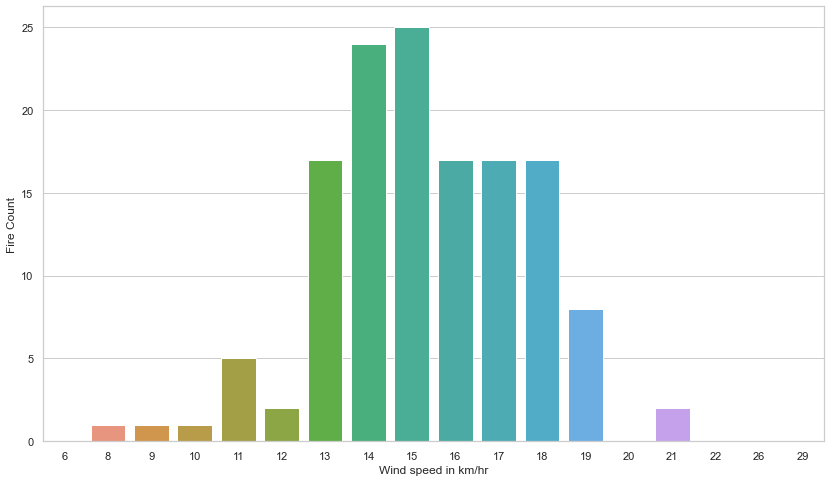

In [58]:
barchart('Ws','Wind speed in km/hr')

When the wind speed was from 13-19 Km/hr the most fire incident occured

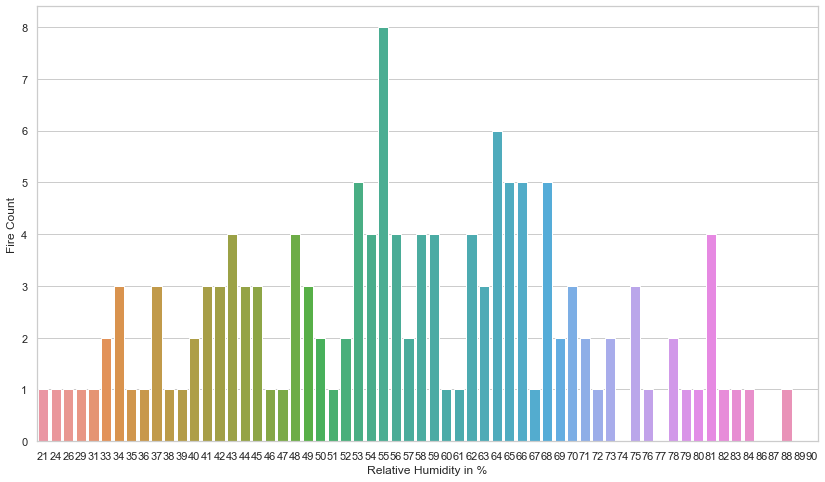

In [59]:
barchart('RH','Relative Humidity in %')

When humidity ranges between 50-80% there is highest number of fire incident

In [65]:
df_out=df.drop(['date','Classes','Region','month'],axis=1)
df_out

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


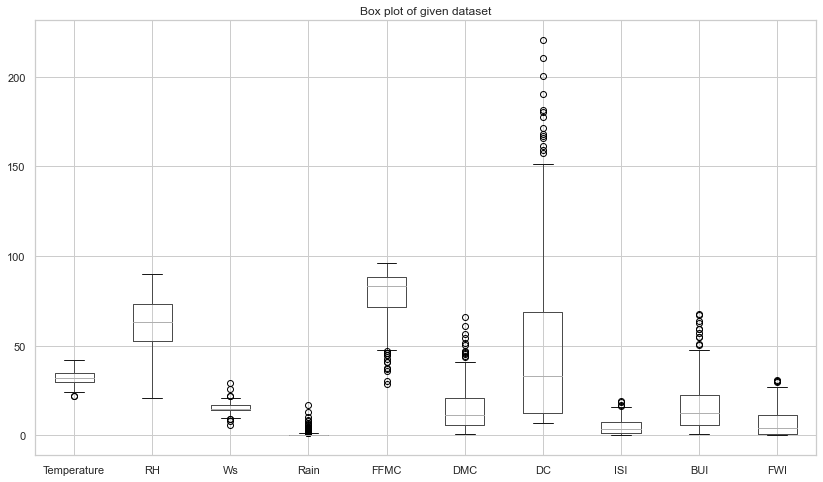

In [67]:
plt.figure(figsize=(14,8))
ax=df_out.boxplot()
ax.set_title('Box plot of given dataset')
plt.show()